In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap

sys.path.insert(1, os.path.join(sys.path[0], "code/implementation"))
from layer_v2 import Layer
from neural_network_v2 import NeuralNetwork

# Ring (0.75 f-score)

In [2]:
rings_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-training.csv"
)
rings_test = pd.read_csv("https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-test.csv")
mean = rings_train.mean()
std = rings_train.std()
rings_train[["x", "y"]] = (rings_train[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]
rings_test[["x", "y"]] = (rings_test[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]

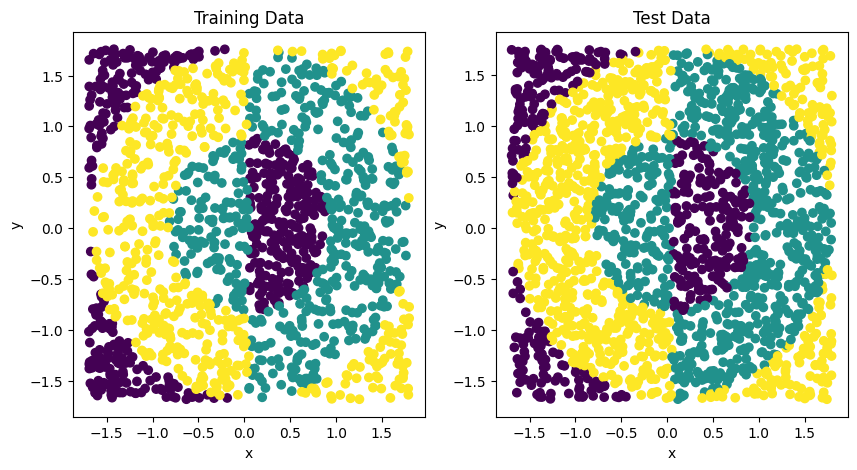

In [3]:
# visualizing the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rings_train["x"], rings_train["y"], c=rings_train["c"], cmap="viridis")
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.scatter(rings_test["x"], rings_test["y"], c=rings_test["c"], cmap="viridis")
plt.title("Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
x = rings_train[["x", "y"]].to_numpy()
y = rings_train["c"].to_numpy().reshape(-1, 1)
# one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(y)
y = encoder.transform(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [5]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 3, "softmax"))

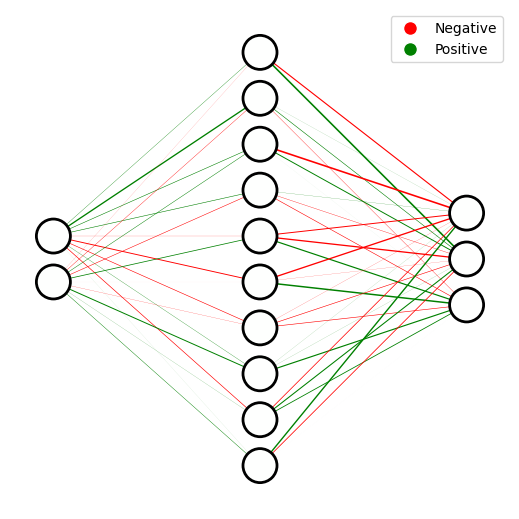

In [6]:
neural.visualize_network()

In [7]:
y_hat = neural.predict(x)
y_hat

array([[0.05384329, 0.22850997, 0.71764674],
       [0.33387278, 0.35723735, 0.30888987],
       [0.16256415, 0.28178378, 0.55565208],
       ...,
       [0.14923727, 0.31254968, 0.53821305],
       [0.11778314, 0.29126481, 0.59095205],
       [0.15554547, 0.31204586, 0.53240868]])

In [8]:
neural.predict_class(x)

array([[2],
       [1],
       [2],
       ...,
       [2],
       [2],
       [2]])

In [9]:
mse = neural.train(x, y, learning_rate=0.1, max_num_epoch=10)
mse

[0.2619252212844209,
 0.1917664110682245,
 0.14043106556474322,
 0.17170823865485238,
 0.12864363099011622,
 0.12843714291591643,
 0.12314334258567765,
 0.1199006869942149,
 0.10698229566690558,
 0.12539052780471016]

In [10]:
rings_train["predicted"] = neural.predict_class(x)
rings_train["correct"] = rings_train["c"] == rings_train["predicted"]

rings_test["predicted"] = neural.predict_class(rings_test[["x", "y"]].to_numpy())
rings_test["correct"] = rings_test["c"] == rings_test["predicted"]

In [11]:
rings_train["predicted"].value_counts()

predicted
2    614
1    483
0    403
Name: count, dtype: int64

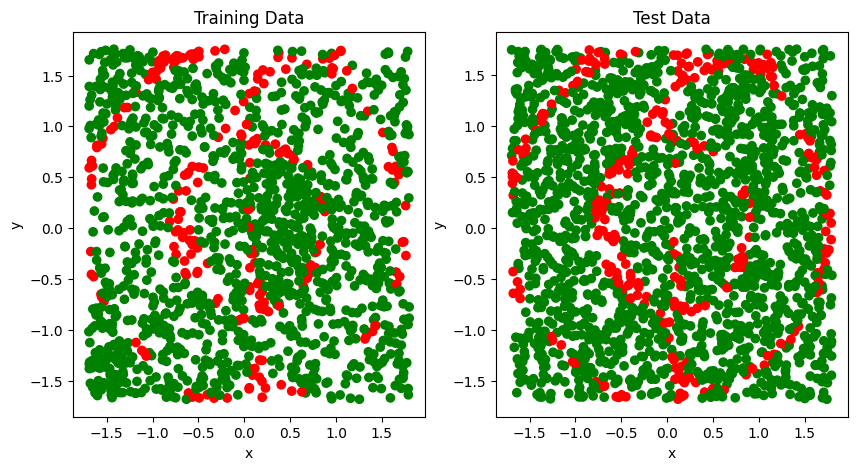

In [12]:
# visualizing the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    rings_train["x"],
    rings_train["y"],
    c=rings_train["correct"],
    cmap=LinearSegmentedColormap.from_list("rg", ["r", "w", "g"], N=256),
)
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.scatter(
    rings_test["x"],
    rings_test["y"],
    c=rings_test["correct"],
    cmap=LinearSegmentedColormap.from_list("rg", ["r", "w", "g"], N=256),
)
plt.title("Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# easy (0.99 f-score)

In [13]:
easy_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/easy-training.csv"
)
easy_test = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/easy-test.csv"
)

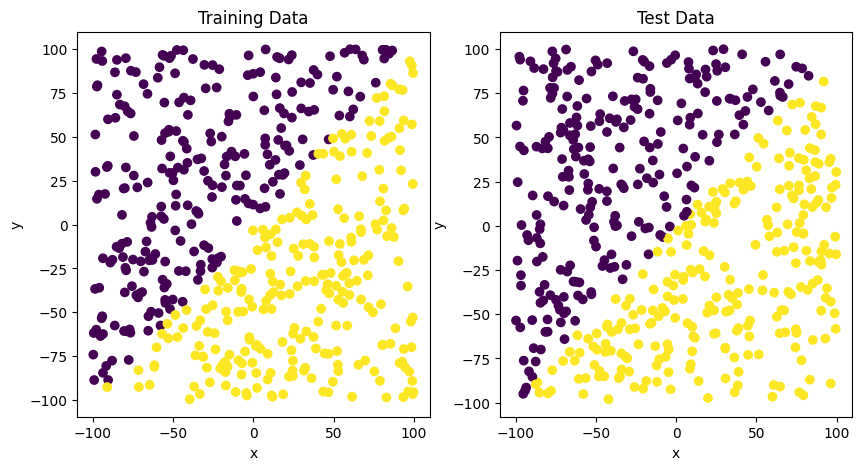

In [14]:
# visualizing the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(easy_train["x"], easy_train["y"], c=easy_train["c"], cmap="viridis")
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.scatter(easy_test["x"], easy_test["y"], c=easy_test["c"], cmap="viridis")
plt.title("Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# xor3 (0.99 f-score)

In [15]:
xor_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/xor3-training.csv"
)
xor_test = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/xor3-test.csv"
)

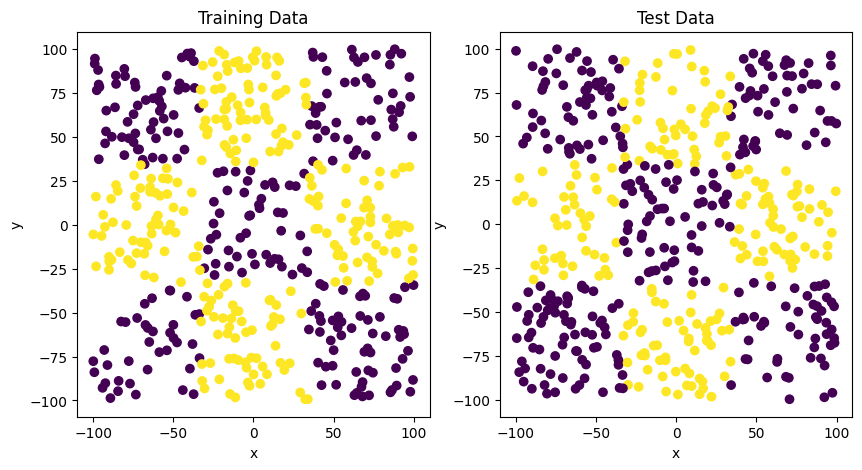

In [16]:
# visualizing the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(xor_train["x"], xor_train["y"], c=xor_train["c"], cmap="viridis")
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
plt.scatter(xor_test["x"], xor_test["y"], c=xor_test["c"], cmap="viridis")
plt.title("Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()